# Simulation Func for Regression 

In [1]:
import pandas as pd
import numpy as np
import lifelines as ll
import sksurv as sks
import matplotlib.pyplot as plt
from bart_survival import surv_bart as sb
# from bart_survival import simulation as sm
import lifelines as ll
from lifelines import KaplanMeierFitter
import subprocess
import importlib

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
import sys
sys.path.append("../py/")
sys.path.append("../src/")
import _conditions1 as cn
import _functions1 as fn
import _sim_iter1 as si
import _plot_fx as pltf
import sim_adj as sm

In [72]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 9, 
    "VAR_CLASS": [2,2,2,2,2,2,2,2,2],
    "VAR_PROB":[.5,.5,.5,.5,.5,.5,.5,.5,.5],
    # "scale_f": "2.5*x_mat[:,0]",
    "scale_f": "np.exp(3 + 0.1*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5]) + x_mat[:,6])",
    "shape_f": "2",
    "cens_scale":3.5
}

In [73]:
cens_perc = []
for i in range(1000):
    rng = np.random.default_rng(i)
    x_mat = sm.get_x_matrix(
        N = 400, 
        x_vars = reg_1["x_vars"], 
        VAR_CLASS=reg_1["VAR_CLASS"],
        VAR_PROB=reg_1["VAR_PROB"],
        rng=rng
        )
    event, sv_true, sv_scale_true = sm.simulate_survival(
        x_mat = x_mat,
        scale_f=reg_1["scale_f"],
        shape_f=reg_1["shape_f"],
        cens_scale = reg_1["cens_scale"],
        rng=rng
    )

    cens_perc.append( event["status"][event["status"] == 0].shape[0]/event["status"].shape[0])
    
np.mean(cens_perc)

mean shape 2.0
mean scale 50.13442180559666
208.0
mean time draws 45.5911584615244
cens mean 169.3525
mean shape 2.0
mean scale 49.777079168357226
229.0
mean time draws 45.63546874841375
cens mean 180.3675
mean shape 2.0
mean scale 51.58921327412054
229.0
mean time draws 46.538643739293995
cens mean 183.74
mean shape 2.0
mean scale 48.53147420804164
229.0
mean time draws 42.035836646545725
cens mean 164.0775
mean shape 2.0
mean scale 52.04132991524729
229.0
mean time draws 45.68574075314911
cens mean 173.3875
mean shape 2.0
mean scale 50.71177163866871
229.0
mean time draws 44.46668173544923
cens mean 163.5875
mean shape 2.0
mean scale 51.92472474987966
229.0
mean time draws 45.50673157178604
cens mean 189.7425
mean shape 2.0
mean scale 51.7194883726942
229.0
mean time draws 47.1468597325495
cens mean 179.985
mean shape 2.0
mean scale 51.252270740191946
229.0
mean time draws 44.68482129390116
cens mean 191.2325
mean shape 2.0
mean scale 51.82413174141029
208.0
mean time draws 45.674239

0.20817750000000002

In [74]:

np.mean(cens_perc)

0.20817750000000002

(0.0, 120.0)

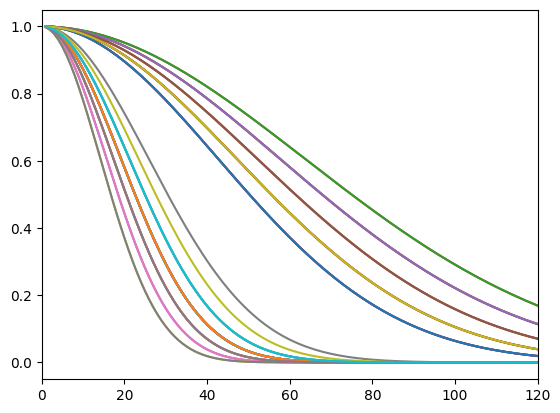

In [76]:

sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(40):
    plt.plot(ttt, sv[i,:])

plt.xlim(0,120)

In [47]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 9, 
    "VAR_CLASS": [2,2,2,2,2,2,2,2,2],
    "VAR_PROB":[.5,.5,.5,.5,.5,.5,.5,.5,.5],
    "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f": "0.7 + 1.3*x_mat[:,6]",
    "cens_scale":3.7
}

In [43]:
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
    N = 400, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sm.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    rng=rng
)


mean shape 1.402
mean scale 62.6375
mean time draws 59.562302359128736


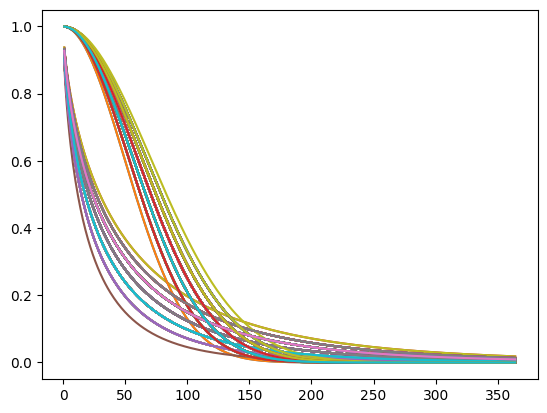

In [45]:
sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(400):
    plt.plot(ttt, sv[i,:])

# Complex Regression

In [67]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 10, 
    "VAR_CLASS": [1,1,1,1,1,1,1,1,1,1],
    "VAR_PROB":[None,None,None,None,None,None,None,None,None,None],
    "scale_f" : "np.exp(3 + 0.5*np.sin(np.pi * x_mat[:,0] * x_mat[:,1]) + np.power((x_mat[:,2]-0.5), 2) + 0.5* x_mat[:,3] + 0.25 * x_mat[:,4])",
    # "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f": "2",
    "cens_scale":3.7
}


In [51]:
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
    N = 400, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sm.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    rng=rng
)

mean shape 2.0
mean scale 44.01964734948047
mean time draws 39.93344379031392


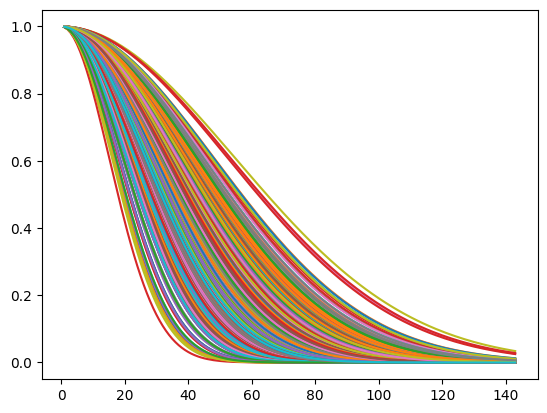

In [52]:
sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(400):
    plt.plot(ttt, sv[i,:])